## Trabalho 2 - Análise de scripts da trilogia "Star wars"
#### INF1030 - Introdução a ciência dos dados

#### Alunos: Leonardo E. Wajnsztok e Samuel Bastos

In [2]:
import pandas as pd
import matplotlib

In [3]:
SW_EP4 = 'Star Wars: Episode IV - A New Hope'
SW_EP5 = 'Star Wars: Episode V - The Empire Strikes Back'
SW_EP6 = 'Star Wars: Episode VI - Return of the Jedi'

movies = [
    {'script': 'star-wars-movie-scripts/SW_EpisodeIV.txt', 'movie': SW_EP4},
    {'script': 'star-wars-movie-scripts/SW_EpisodeV.txt', 'movie': SW_EP5},
    {'script': 'star-wars-movie-scripts/SW_EpisodeVI.txt', 'movie': SW_EP6},
]

In [4]:
trilogy = pd.DataFrame()

for m in movies:
    episode = pd.read_table(m['script'], delim_whitespace=True, header=0, escapechar='\\')
    episode['movie'] = m['movie']    
    trilogy = trilogy.append(episode)

In [5]:
trilogy.shape

(2523, 3)

In [6]:
ax = trilogy[['movie', 'character']].groupby(['movie']).size().plot.barh()
ax.set_xlabel("Dialogue count")

Text(0.5,0,'Dialogue count')

## All characters

In [7]:
all_characters_ep1 = trilogy.character.unique()
print (len(all_characters_ep1), 'characters')
print (all_characters_ep1)

129 characters
['THREEPIO' 'LUKE' 'IMPERIAL OFFICER' 'VADER' 'REBEL OFFICER' 'TROOPER'
 'CHIEF PILOT' 'CAPTAIN' 'WOMAN' 'FIXER' 'CAMIE' 'BIGGS' 'DEAK' 'LEIA'
 'COMMANDER' 'SECOND OFFICER' 'FIRST TROOPER' 'SECOND TROOPER' 'BERU'
 'OWEN' 'AUNT BERU' 'BEN' 'TAGGE' 'MOTTI' 'TARKIN' 'BARTENDER' 'CREATURE'
 'HUMAN' 'HAN' 'GREEDO' 'JABBA' 'OFFICER CASS'
 'VOICE OVER DEATH STAR INTERCOM' 'OFFICER' 'VOICE' 'GANTRY OFFICER'
 'INTERCOM VOICE' 'TROOPER VOICE' 'FIRST OFFICER' 'WILLARD'
 'DEATH STAR INTERCOM VOICE' 'DODONNA' 'GOLD LEADER' 'WEDGE' 'MAN'
 'RED LEADER' 'CHIEF' 'MASSASSI INTERCOM VOICE' 'RED TEN' 'RED SEVEN'
 'PORKINS' 'RED NINE' 'RED ELEVEN' 'ASTRO-OFFICER' 'CONTROL OFFICER'
 'GOLD FIVE' 'GOLD TWO' 'WINGMAN' 'BASE VOICE' 'TECHNICIAN' 'RIEEKAN'
 'DECK OFFICER' 'ASSISTANT OFFICER' 'LIEUTENANT' 'DERLIN' 'ZEV'
 'ANNOUNCER' 'SENIOR CONTROLLER' 'PIETT' 'OZZEL' 'REBEL CAPTAIN'
 'REBEL FIGHTER' 'MEDICAL DROID' 'CONTROLLER' 'VEERS' 'HOBBIE' 'PILOTS'
 'WOMAN CONTROLLER' 'DACK' 'TRENCH OFFICER' '

Text(0.5,0,'Character count')

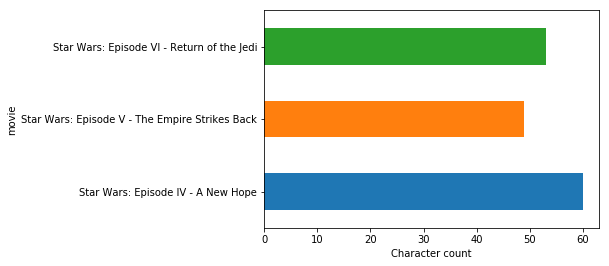

In [8]:
ax = trilogy[['movie', 'character']].groupby(['movie']).character.nunique().plot.barh()
ax.set_xlabel("Character count")

## Dialogue count in all trilogy

In [9]:
trilogy_dialogue_count = trilogy.groupby(['character']).dialogue.count()
trilogy_dialogue_count.sort_values(ascending=False).head(10)

character
LUKE          494
HAN           459
THREEPIO      301
LEIA          227
VADER         140
BEN           115
LANDO         101
YODA           49
EMPEROR        44
RED LEADER     38
Name: dialogue, dtype: int64

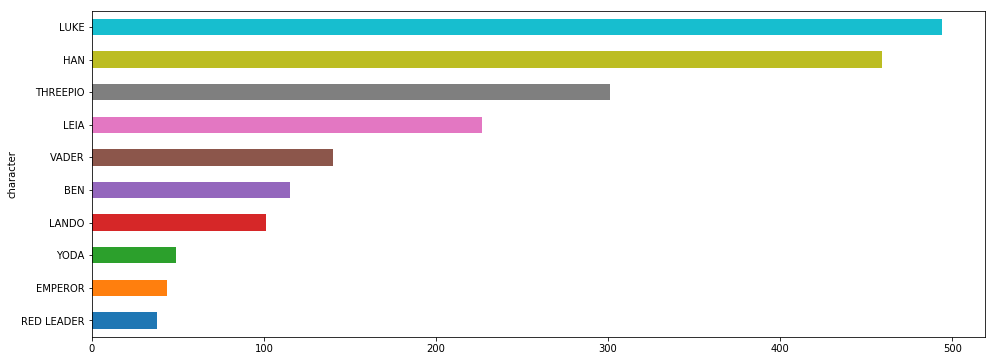

In [10]:
ax =trilogy_dialogue_count.sort_values()[-10:].plot.barh(figsize=(16,6))

## Dialogue count by character and movie

In [11]:
character_dialogue_count = trilogy.groupby(['character', 'movie']).size().unstack('movie')
character_dialogue_count = character_dialogue_count.fillna(0)

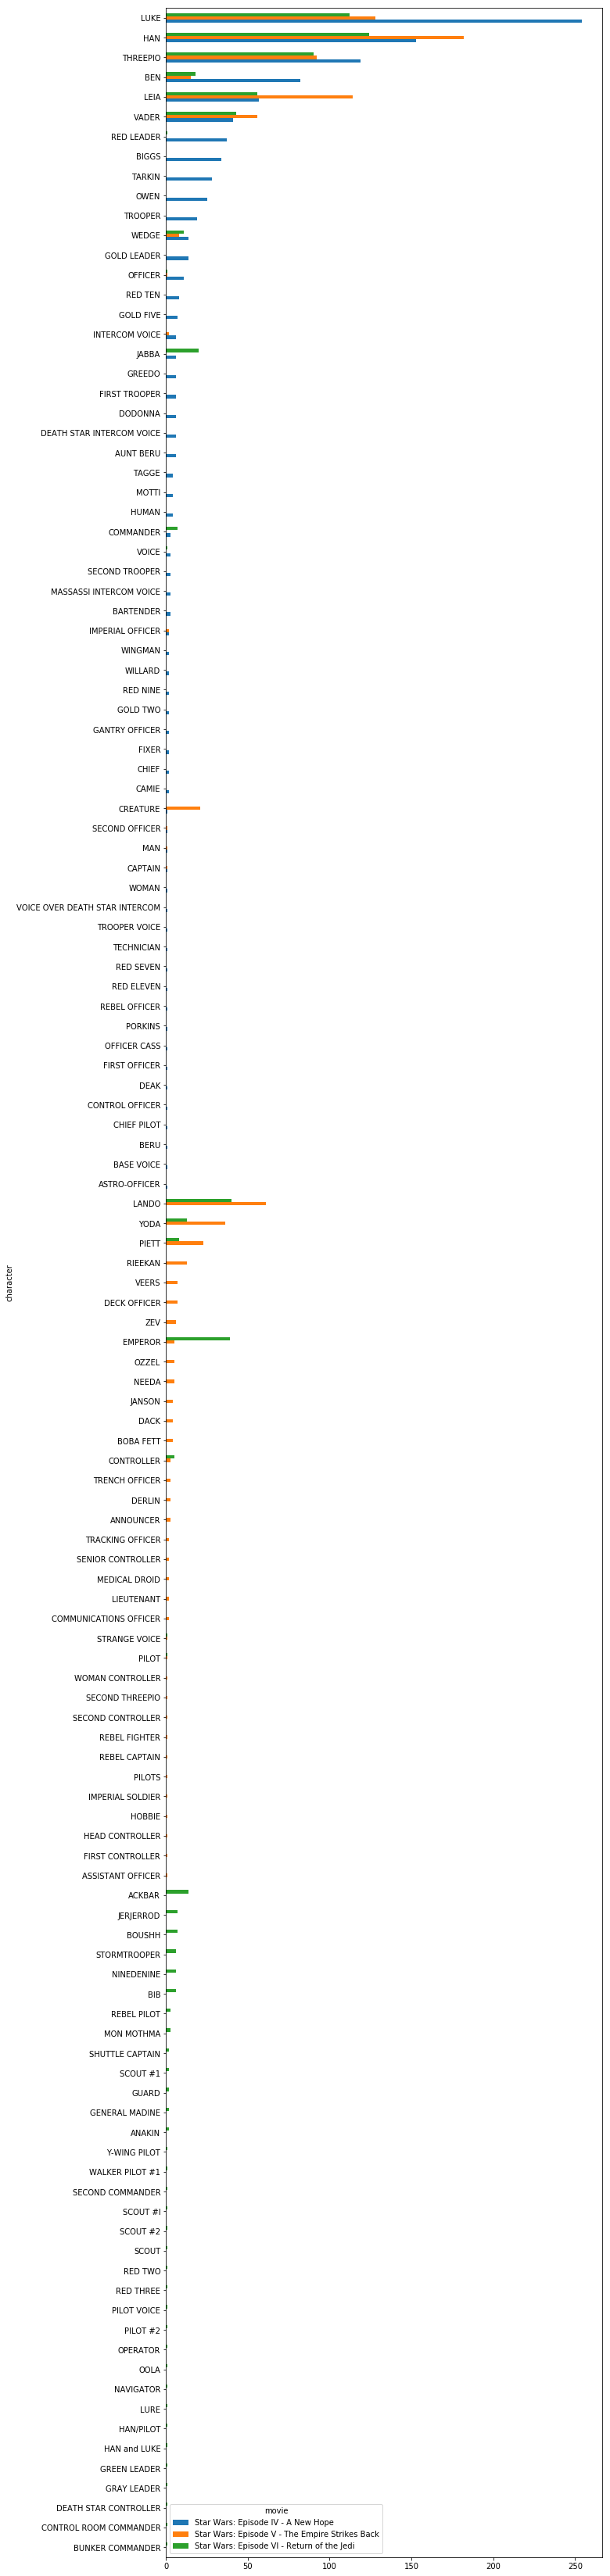

In [12]:
character_dialogue_count.sort_values(by=[SW_EP4,SW_EP5,SW_EP6], ascending=True).plot.barh(figsize=(10,60))

## Word count by dialogue

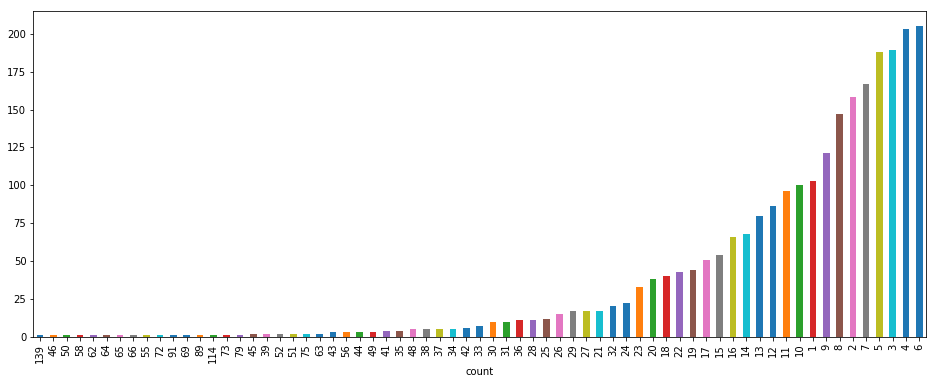

In [13]:
import string
import nltk

def clean(x):
    return [s for s in nltk.word_tokenize(x) if s not in set(string.punctuation)]
    
tokenized = trilogy['dialogue'].apply(clean)

wordCount = []
i = 0
for token in tokenized:
    wordCount.append(len(token))
trilogy['count'] = wordCount

trilogy_word_count = trilogy.groupby(['count']).size()
trilogy_word_count.sort_values().plot.bar(figsize=(16,6))

## Most used words

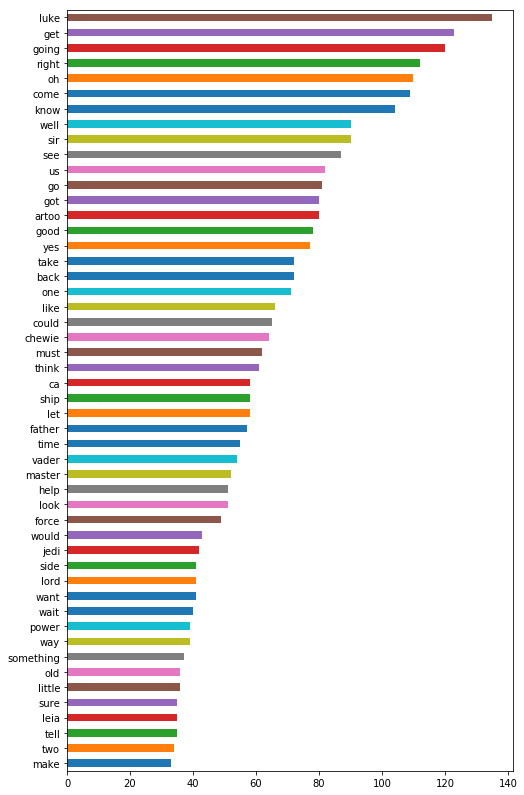

In [37]:
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

stop_words_set = set(stopwords.words("english"))
stop_words_set.add("n't")
stop_words_set.add("...")
stop_words_set.add("'s")
stop_words_set.add("'re")
stop_words_set.add("'m")
stop_words_set.add("'ll")
stop_words_set.add("'ve")
stop_words_set.add("'ve")
stop_words_set.add("'d")

def clean(x):
    x = x.lower()
    tokens = nltk.word_tokenize(x)
    tokens = [t for t in tokens if t not in set(string.punctuation)]
    tokens = [t for t in tokens if t not in stop_words_set]
    return tokens
    
tokenized_wo_stopword = trilogy['dialogue'].apply(clean)
most_used_words_dict = {}

for token in tokenized_wo_stopword:
    for word in token:
        if word in most_used_words_dict:
            most_used_words_dict[word] = most_used_words_dict[word] + 1
        else:
            most_used_words_dict[word] = 0

muw = pd.Series(data=most_used_words_dict)
muw.sort_values()[-50:].plot.barh(figsize=(8,14))

## Most used words by main characters

In [22]:
#LUKE          494
#HAN           459
#THREEPIO      301
#LEIA          227
#VADER         140
most_talkative = ['LUKE', 'HAN', 'THREEPIO', 'LEIA', 'VADER']
character_most_used_words = {}

for character in most_talkative:
    char_dialogues = trilogy[trilogy.character == character]

    tokenized_wo_stopword = char_dialogues['dialogue'].apply(clean)
    most_used_words_dict = {}

    for token in tokenized_wo_stopword:
        for word in token:
            if word in most_used_words_dict:
                most_used_words_dict[word] = most_used_words_dict[word] + 1
            else:
                most_used_words_dict[word] = 0

    muw = pd.Series(data=most_used_words_dict)
    character_most_used_words[character] = muw
    

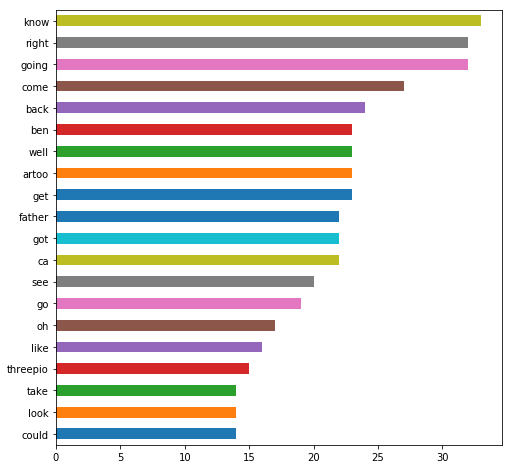

In [29]:
character_most_used_words.get('LUKE').sort_values()[-20:].plot.barh(figsize=(8,8))

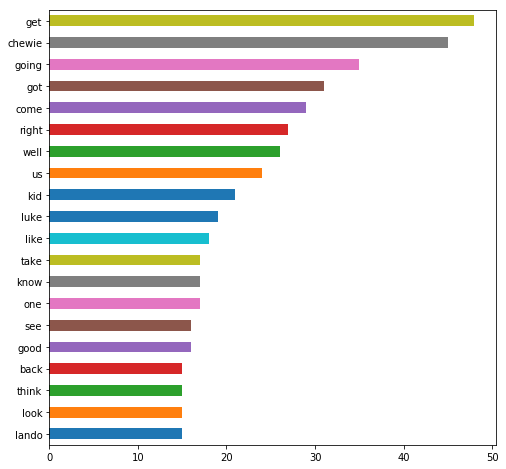

In [30]:
character_most_used_words.get('HAN').sort_values()[-20:].plot.barh(figsize=(8,8))

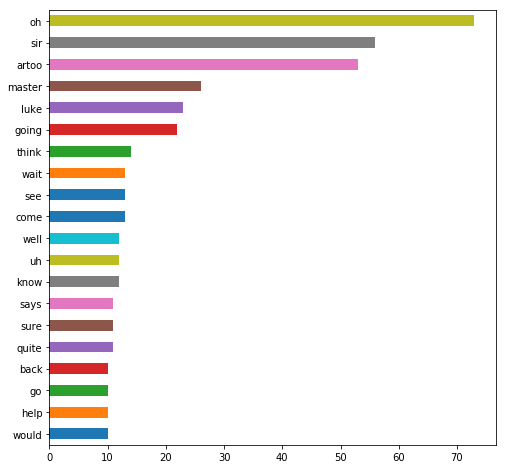

In [32]:
character_most_used_words.get('THREEPIO').sort_values()[-20:].plot.barh(figsize=(8,8))

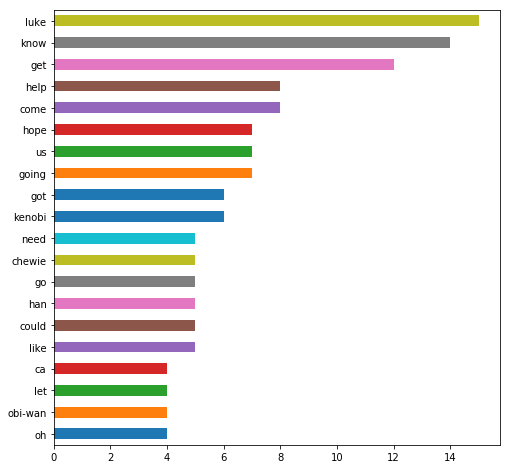

In [33]:
character_most_used_words.get('LEIA').sort_values()[-20:].plot.barh(figsize=(8,8))

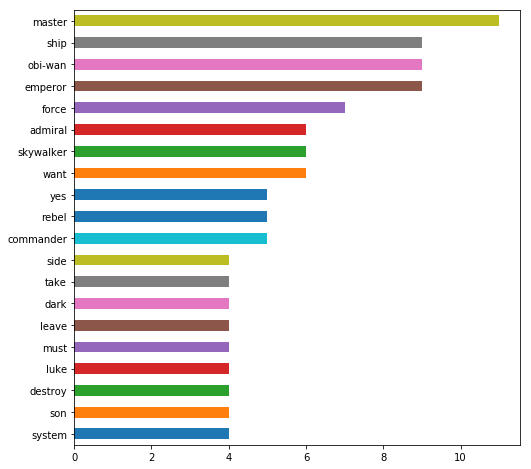

In [34]:
character_most_used_words.get('VADER').sort_values()[-20:].plot.barh(figsize=(8,8))